In [4]:
#importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import *
from tkinter.ttk import Scale
from tkinter import colorchooser,filedialog,messagebox
import PIL.ImageGrab as ImageGrab
from PIL import Image
import cv2
import os

In [6]:
#importing the dataset and seperating x and y training and test values
df1 = pd.read_csv('mnist_train.csv')
n_samples = int(60000)
Y_train = np.array(df1.iloc[:n_samples,0]).T
X_train = np.array(df1.iloc[:n_samples,1:].T/255)
df2 = pd.read_csv('mnist_test.csv')
Y_test = np.array(df2.iloc[:10000,0]).T
X_test = np.array(df2.iloc[:10000,1:].T/255)

In [7]:
# Check the shapes of training sets
# print("X_train: ",X_train.shape)
# print("Y_train: ",Y_test.shape)
# print(Y_train[0])

In [8]:
## We want answer as a probability so we will have to convert the input labels 'Y'
## into probabilities i.e. '1' for that digit and '0' for the rest.
def transform(y):
    temp = np.zeros((y.size,10))
    temp[np.arange(y.size),y] = 1
    temp = temp.T
    return temp
Y_test_prob = transform(Y_test)
Y_train_prob = transform(Y_train)
print(Y_train[:5])
print(Y_train_prob[:,:5].T)

[5 0 4 1 9]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [9]:
def initialize_parameters():
    W1 = np.random.randn(512,784)
    W2 = np.random.randn(10,512)
    b1 = np.zeros((512,1))
    b2 = np.zeros((10,1))
    return W1,W2,b1,b2

In [10]:
# Define all the activation functions which return activation values.
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def relu(x):
    return np.maximum(0,x)
#     return np.maximum(x*1e-3,x),x
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x) + np.exp(-x))

def softmax(x):
    return np.exp(x)/(np.sum(np.exp(x),axis = 0, keepdims = True))

def probability(x):
    return x/(np.sum(x,axis = 1,keepdims = True))

In [11]:
def forward_prop(X,W1,b1,W2,b2):
    Z1 = np.dot(W1,X) + b1 #(128,784)*(784, 10000) = (128,10000)
    Z1 = Z1/100
    A1 = relu(Z1) #(128,10000)
    Z2 = np.dot(W2,A1) + b2 #(10,128)*(128,10000) = (10,10000)
    A2 = sigmoid(Z2) #(10,10000)
    A2 = softmax(Z2)
    return A1,A2,Z1

In [12]:
def backward_prop(A2,Y,A1,W2,X,Z1):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2,A1.T)/m #(10,128)
    db2 = np.sum(dZ2,axis = 1,keepdims = True)/m #(10,1)
    g_z = Z1 > 0    #for ReLU activation function
#     g_z = Z1*(1-Z1)
    dZ1 = np.multiply(np.dot(W2.T,dZ2),g_z)
    dW1 = np.dot(dZ1,X.T)/m # (128,784)
    db1 = np.sum(dZ1,1,keepdims = True)/m #(128,1)
    return dW1,dW2,db1,db2,dZ2,dZ1,g_z

In [13]:
def compute_accuracy(AL,Y):
    count = int(0)
    m = Y.shape[0]
    prediction = np.argmax(AL,0) == Y
#     for i in range(m):
#         if  prediction[i] == Y[i]:  #np.argmax(AL[:,i])
    count = np.sum(prediction)
    # -np.average(y*np.log(p) + (1-y)*np.log(1-p))
#     np.squeeze(cost) ## Transforms single dimensional value matrix to simple values
    return count/m*100

In [14]:
def compute_cost(AL,Y):
    m = Y.shape[0]
    cost = -1*np.sum(np.multiply(np.log(AL),Y) + np.multiply(np.log(1-AL),1-Y))/m
    # -np.average(y*np.log(p) + (1-y)*np.log(1-p))
    np.squeeze(cost) ## Remove single dimensional values
    return cost

In [15]:
def predict(X,W1,b1,W2,b2):
    a,prob,c = forward_prop(X,W1,b1,W2,b2)
    return np.argmax(prob,0)  ## If we pass one example only then it will give error

In [16]:
W1,W2,b1,b2 = initialize_parameters()

In [17]:
epochs = int(200)
lr = float(0.1)
accuracy = int(0)
for i in range(epochs):
    A1,A2,Z1 = forward_prop(X_train,W1,b1,W2,b2)
    dW1,dW2,db1,db2,dZ2,dZ1,g_z = backward_prop(A2,Y_train_prob,A1,W2,X_train,Z1)
    W1 = W1 - lr*dW1
    W2 = W2 - lr*dW2
    b1 = b1 - lr*db1
    b2 = b2 - lr*db2
    if i%(epochs/10) == 0:
        print(f"epoch: {i} accuracy: {compute_accuracy(A2,Y_train)}")
#         print()
#         print(db2)  Cost:{compute_cost(A2,Y_train)}
#         print(f"epoch: {i+1} g_z: {g_z} dW1: {dW1} dZ1:{dZ1} ") #b1: {b1} b2: {b2} dW2: {dW2} db1:{db1} db2: {db2} W1: {W1} W2: {W2}
#         print(f"Z1: {Z1} A1: {A1} A2:{A2}")
    
print("done")    

epoch: 0 accuracy: 8.618333333333334
epoch: 20 accuracy: 74.11666666666666
epoch: 40 accuracy: 81.84166666666667
epoch: 60 accuracy: 84.66166666666666
epoch: 80 accuracy: 86.32666666666667
epoch: 100 accuracy: 87.31333333333333
epoch: 120 accuracy: 88.095
epoch: 140 accuracy: 88.65166666666666
epoch: 160 accuracy: 89.1
epoch: 180 accuracy: 89.52833333333334
done


In [18]:
# Calculate accuracy on test set
_,A_test,_ = forward_prop(X_test,W1,b1,W2,b2)
print(compute_accuracy(A_test,Y_test))

90.18


In [19]:
ans = predict(X_test[:,:15],W1,b1,W2,b2)
# np.argmax(ans)
ans

# print(A2[:,:5])
# np.argmax(A2,0)

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1], dtype=int64)

In [20]:
Tm = np.array([[1,2,3,4],
              [1,2,3,4],
              [1,2,3,4],
              [1,2,3,4]])
Ts = np.array([3,0,2,3])
print(np.sum(Tm,0))

[ 4  8 12 16]


5
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
   18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
  253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.

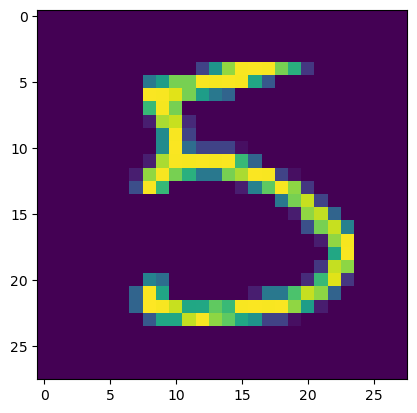

In [21]:
print(Y_test[15])
plt.imshow(X_test[:,15].reshape(28,28))
print(X_train[:,0].reshape(28,28)*255)

In [22]:
np.argmax(softmax(Y_test_prob[:,15]))

5

(784, 1)


KeyboardInterrupt: 

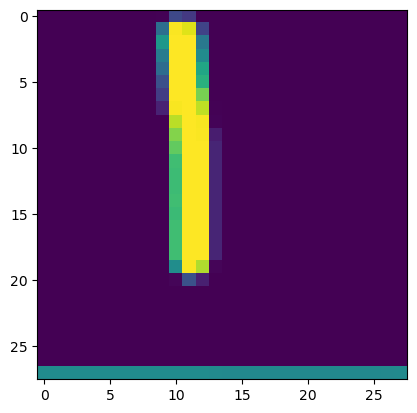

In [23]:


def identify():
    image = Image.open('temp.jpg').convert('L')
    plt.imshow(image)
    data = 255 - np.asarray(image)
    res = cv2.resize(data, dsize=(28, 28), interpolation=cv2.INTER_AREA)
    plt.imshow(res)
    res = res.reshape(-1,1)/255
#     print(type(res))
    print(res.shape)
    ans = predict(res,W1,b1,W2,b2)
#     if messagebox.askquestion("Number guesser" , "Did you draw" + str(ans)):
#         if messagebox.askretrycancel():
#             identify()
#         else:
#             return 0
#     else:
#         if messagebox.askretrycancel():
#             identify()
#         else:
#             return 0
    print(ans)
identify()


In [ ]:


#Defining Class and constructor of the Program
class Draw():
    def __init__(self,root):

#Defining title and Size of the Tkinter Window GUI
        self.root =root
        self.root.title("Digit Drawing Tool")
        self.root.geometry("400x350")
        self.root.configure(background="white")
        # self.root.resizable(0,0)
 
#variables for pointer and Eraser   
        self.pointer= "black"
        self.erase="white"

#Widgets for Tkinter Window
    
# Configure the alignment , font size and color of the text
        text=Text(root)
        text.tag_configure("tag_name", justify='center', font=('arial',25),background='#292826',foreground='orange')

# Insert a Text
        text.insert("1.0", "Draw only one digit (0-9)")

# Add the tag for following given text
        text.tag_add("tag_name", "1.0", "end")
        text.pack()
        
# Pick a color for drawing from color pannel
        # self.pick_color = LabelFrame(self.root,font =('arial',15),bd=5,relief=RIDGE,bg="white")
        # self.pick_color.place(x=0,y=40,width=45,height=45)

        # # colors = ['blue','red','green', 'orange','violet','black','yellow','purple','pink','gold','brown','indigo']
        # color = 'black'
        # i=j=0
        # Button(self.pick_color,bg=color,bd=2,relief=RIDGE,width=3,command=lambda col=color:self.select_color(col)).grid(row=i,column=j)
        # # for color in colors:
        # #     i+=1
        #     if i==6:
        #         i=0
        #         j=1

 # Erase Button and its properties   
        self.eraser_btn= Button(self.root,text="Eraser",bd=4,bg='white',command=self.eraser,width=9,relief=RIDGE)
        self.eraser_btn.place(x=0,y=40)

# Reset Button to clear the entire screen 
        self.clear_screen= Button(self.root,text="Clear Screen",bd=4,bg='white',command= lambda : self.background.delete('all'),width=9,relief=RIDGE)
        self.clear_screen.place(x=0,y=70)

# Save Button for saving the image in local computer
        self.save_btn= Button(self.root,text="Identify",bd=4,bg='white',command=self.save_drawing,width=9,relief=RIDGE)
        self.save_btn.place(x=0,y=100)

# Background Button for choosing color of the Canvas
        # self.bg_btn= Button(self.root,text="Background",bd=4,bg='white',command=self.canvas_color,width=9,relief=RIDGE)
        # self.bg_btn.place(x=0,y=287)


#Creating a Scale for pointer and eraser size
        self.pointer_frame= LabelFrame(self.root,text='size',bd=5,bg='white',font=('arial',15,'bold'),relief=RIDGE)
        self.pointer_frame.place(x=0,y=130,height=200,width=70)

        self.pointer_size =Scale(self.pointer_frame,orient=VERTICAL,from_ =48 , to =0, length=168)
        self.pointer_size.set(1)
        self.pointer_size.grid(row=0,column=1,padx=15)


#Defining a background color for the Canvas 
        self.background = Canvas(self.root,bg='white',bd=5,relief=GROOVE,height=470,width=680)
        self.background.place(x=80,y=40)


#Bind the background Canvas with mouse click
        self.background.bind("<B1-Motion>",self.paint) 


# Functions are defined here

# Paint Function for Drawing the lines on Canvas
    def paint(self,event):       
        x1,y1 = (event.x-2), (event.y-2)  
        x2,y2 = (event.x+2), (event.y+2)  

        self.background.create_oval(x1,y1,x2,y2,fill=self.pointer,outline=self.pointer,width=self.pointer_size.get())

# Function for choosing the color of pointer  
    def select_color(self,col):
        self.pointer = col

# Function for defining the eraser
    def eraser(self):
        self.pointer= self.erase

# Function for choosing the background color of the Canvas    
    def canvas_color(self):
        color=colorchooser.askcolor()
        self.background.configure(background=color[1])
        self.erase= color[1]

# Function for saving the image file in Local Computer
    def save_drawing(self):
        try:
            # self.background update()
#             file_ss =filedialog.asksaveasfilename(defaultextension='jpg')
            #print(file_ss)
            x = self.root.winfo_rootx() + self.background.winfo_x() + 60
            #print(x, self.background.winfo_x())
            y = self.root.winfo_rooty() + self.background.winfo_y() + 55
            #print(y)
            x1= x + self.background.winfo_width() - 3*self.background.winfo_x() -90
            #print(x1)
            y1= y + self.background.winfo_height() - 2*self.background.winfo_y() -40
            #print(y1)
            ImageGrab.grab().crop((x , y, x1, y1)).save("temp.jpg")
#             messagebox.showinfo('Please wait')
            identify()
        except:
            print("Error. Please wait")

if __name__ =="__main__":
    root = Tk()
    p= Draw(root)
    root.mainloop()